### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import data

In [2]:
data = pd.read_csv('house_prices.csv')
location_data = pd.read_csv('locations.csv')
fin_data = pd.read_csv('housing_data.csv')

In [3]:
fin_data.head()

,Bedrooms,Bathrooms,Location,Price
0,3,3.0,Parklands,28000000
1,1,1.0,Lavington,6500000
2,0,1.0,Ngara,2700000
3,2,1.0,Ngong Road,5400000
4,1,1.0,Ngong Road,4000000


### Prepare X and y variables

In [4]:
X = fin_data.drop(columns=['Price'], axis=1)
X.head()

,Bedrooms,Bathrooms,Location
0,3,3.0,Parklands
1,1,1.0,Lavington
2,0,1.0,Ngara
3,2,1.0,Ngong Road
4,1,1.0,Ngong Road


In [5]:
y = fin_data['Price']
y.head()

0    28000000
1     6500000
2     2700000
3     5400000
4     4000000
Name: Price, dtype: int64

In [6]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns


### Create column transformer

In [7]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [8]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
[
    ('OneHotEncoder', cat_transformer, cat_features),
    ('StandardScaler', num_transformer, num_features)
])



In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = preprocessor.fit_transform(X)
X

<849x40 sparse matrix of type '<class 'numpy.float64'>'
	with 2547 stored elements in Compressed Sparse Row format>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((679, 40), (170, 40))

In [12]:
y_train.shape, y_test.shape

((679,), (170,))

### Create an evaluation model function to return model training metrics

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [14]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42),
    'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42)
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    # Train the model
    model.fit(X_train, y_train) 
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for training set')
    print(f'-Root Mean Squared Error: {model_train_rmse:.4f}.')
    print(f'-Mean Absolute Error: {model_train_mae:.4f}.')
    print(f'-R2 Score: {model_train_r2:.4f}.')
    
    print('----------------------------------------------------------')
    print('Model performance for test set')
    print(f'-Root Mean Squared Error: {model_test_rmse:.4f}.')
    print(f'-Mean Absolute Error: {model_test_mae:.4f}.')
    print(f'-R2 Score: {model_test_r2:.4f}.')
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

Linear Regression
Model performance for training set
-Root Mean Squared Error: 6207477.8320.
-Mean Absolute Error: 4039097.9557.
-R2 Score: 0.6091.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 7001898.5906.
-Mean Absolute Error: 4325718.4085.
-R2 Score: 0.4955.


Lasso
Model performance for training set
-Root Mean Squared Error: 6207477.8288.
-Mean Absolute Error: 4039079.9799.
-R2 Score: 0.6091.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 7012106.9167.
-Mean Absolute Error: 4338653.7229.
-R2 Score: 0.4941.


Ridge
Model performance for training set
-Root Mean Squared Error: 6251741.1252.
-Mean Absolute Error: 4105689.8567.
-R2 Score: 0.6035.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 6698169.4439.
-Mean Absolute Error: 4291870.5745.
-R2 Score: 0.5383.




C:\Users\MARK\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5992913182563922.0, tolerance: 6692427592849.601
  model = cd_fast.sparse_enet_coordinate_descent(


K-Neighbors Regressor
Model performance for training set
-Root Mean Squared Error: 6611663.2744.
-Mean Absolute Error: 4254429.8969.
-R2 Score: 0.5565.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 6811375.8254.
-Mean Absolute Error: 4364962.1824.
-R2 Score: 0.5226.


Decision Tree Regressor
Model performance for training set
-Root Mean Squared Error: 5675945.2826.
-Mean Absolute Error: 3383750.3710.
-R2 Score: 0.6731.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 6474404.5744.
-Mean Absolute Error: 4115724.4170.
-R2 Score: 0.5687.


Random Forest Regressor
Model performance for training set
-Root Mean Squared Error: 5747084.7580.
-Mean Absolute Error: 3573401.4942.
-R2 Score: 0.6649.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 6358771.9740.
-Mean Absolute Error: 4029281.2095.


In [15]:
from sklearn.compose import TransformedTargetRegressor

In [16]:
the_model = TransformedTargetRegressor(regressor=LinearRegression(),
                                   transformer=StandardScaler())

In [17]:
# Train the model
the_model.fit(X_train, y_train) 

# Make predictions
y_train_pred = the_model.predict(X_train)
y_test_pred = the_model.predict(X_test)

#Evaluate train and test dataset
model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

# print(list(models.keys())[i])
# model_list.append(list(models.keys())[i])

print('Model performance for training set')
print(f'-Root Mean Squared Error: {model_train_rmse:.4f}.')
print(f'-Mean Absolute Error: {model_train_mae:.4f}.')
print(f'-R2 Score: {model_train_r2:.4f}.')

print('----------------------------------------------------------')

print('Model performance for test set')
print(f'-Root Mean Squared Error: {model_test_rmse:.4f}.')
print(f'-Mean Absolute Error: {model_test_mae:.4f}.')
print(f'-R2 Score: {model_test_r2:.4f}.')
r2_list.append(model_test_r2)

# print('='*35)
# print('\n')

Model performance for training set
-Root Mean Squared Error: 6207477.8318.
-Mean Absolute Error: 4039098.3686.
-R2 Score: 0.6091.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 7001898.0098.
-Mean Absolute Error: 4325718.1545.
-R2 Score: 0.4955.


In [18]:
models_std = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42),
    'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42)
}

model_list_std = []
r2_list_std = []

for i in range(len(list(models_std))):
    model_std = list(models_std.values())[i]
    the_model_std = TransformedTargetRegressor(regressor=model_std,
                                   transformer=StandardScaler())
    # Train the model
    the_model_std.fit(X_train, y_train) 
    
    # Make predictions
    y_train_pred_std = the_model_std.predict(X_train)
    y_test_pred_std = the_model_std.predict(X_test)
    
    #Evaluate train and test dataset
    model_train_mae_std, model_train_rmse_std, model_train_r2_std = evaluate_model(y_train, y_train_pred_std)
    model_test_mae_std, model_test_rmse_std, model_test_r2_std = evaluate_model(y_test, y_test_pred_std)

    print(list(models_std.keys())[i])
    model_list_std.append(list(models_std.keys())[i])
    
    print('Model performance for training set')
    print(f'-Root Mean Squared Error: {model_train_rmse_std:.4f}.')
    print(f'-Mean Absolute Error: {model_train_mae_std:.4f}.')
    print(f'-R2 Score: {model_train_r2_std:.4f}.')
    
    print('----------------------------------------------------------')
    
    print('Model performance for test set')
    print(f'-Root Mean Squared Error: {model_test_rmse_std:.4f}.')
    print(f'-Mean Absolute Error: {model_test_mae_std:.4f}.')
    print(f'-R2 Score: {model_test_r2_std:.4f}.')
    r2_list_std.append(model_test_r2_std)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for training set
-Root Mean Squared Error: 6207477.8318.
-Mean Absolute Error: 4039098.3686.
-R2 Score: 0.6091.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 7001898.0098.
-Mean Absolute Error: 4325718.1545.
-R2 Score: 0.4955.


Lasso
Model performance for training set
-Root Mean Squared Error: 9927889.9280.
-Mean Absolute Error: 7668220.9544.
-R2 Score: 0.0000.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 9858673.6164.
-Mean Absolute Error: 7433552.6244.
-R2 Score: -0.0001.


Ridge
Model performance for training set
-Root Mean Squared Error: 6251741.1260.
-Mean Absolute Error: 4105689.7925.
-R2 Score: 0.6035.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 6698169.4332.
-Mean Absolute Error: 4291870.5191.
-R2 Score: 0.5383.


K-Neighbors Regres

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
models_min = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'XGB Regressor': XGBRegressor(random_state=42),
    'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42)
}

model_list_min = []
r2_list_min = []

for i in range(len(list(models_min))):
    model_min = list(models_min.values())[i]
    the_model_min = TransformedTargetRegressor(regressor=model_min,
                                   transformer=MinMaxScaler())
    # Train the model
    the_model_min.fit(X_train, y_train) 
    
    # Make predictions
    y_train_pred_min = the_model_min.predict(X_train)
    y_test_pred_min = the_model_min.predict(X_test)
    
    #Evaluate train and test dataset
    model_train_mae_min, model_train_rmse_min, model_train_r2_min = evaluate_model(y_train, y_train_pred_min)
    model_test_mae_min, model_test_rmse_min, model_test_r2_min = evaluate_model(y_test, y_test_pred_min)

    print(list(models_min.keys())[i])
    model_list_min.append(list(models_min.keys())[i])
    
    print('Model performance for training set')
    print(f'-Root Mean Squared Error: {model_train_rmse_min:.4f}.')
    print(f'-Mean Absolute Error: {model_train_mae_min:.4f}.')
    print(f'-R2 Score: {model_train_r2_min:.4f}.')
    
    print('----------------------------------------------------------')
    
    print('Model performance for test set')
    print(f'-Root Mean Squared Error: {model_test_rmse_min:.4f}.')
    print(f'-Mean Absolute Error: {model_test_mae_min:.4f}.')
    print(f'-R2 Score: {model_test_r2_min:.4f}.')
    r2_list_min.append(model_test_r2_min)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for training set
-Root Mean Squared Error: 6207477.8320.
-Mean Absolute Error: 4039098.1873.
-R2 Score: 0.6091.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 7001898.3344.
-Mean Absolute Error: 4325718.1849.
-R2 Score: 0.4955.


Lasso
Model performance for training set
-Root Mean Squared Error: 9927889.9280.
-Mean Absolute Error: 7668220.9544.
-R2 Score: 0.0000.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 9858673.6164.
-Mean Absolute Error: 7433552.6244.
-R2 Score: -0.0001.


Ridge
Model performance for training set
-Root Mean Squared Error: 6251741.1256.
-Mean Absolute Error: 4105689.8244.
-R2 Score: 0.6035.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 6698169.4385.
-Mean Absolute Error: 4291870.5466.
-R2 Score: 0.5383.


K-Neighbors Regres

In [21]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model name', 'R2_score']).sort_values(by=['R2_score'], ascending=False)

,Model name,R2_score
5,Random Forest Regressor,0.583947
4,Decision Tree Regressor,0.568678
6,XGB Regressor,0.563666
7,CatBoost Regressor,0.552344
2,Ridge,0.538349
3,K-Neighbors Regressor,0.522612
8,AdaBoost Regressor,0.515905
0,Linear Regression,0.495532
1,Lasso,0.494060


In [22]:
pd.DataFrame(list(zip(model_list_std, r2_list_std)), columns=['Model name', 'R2_score']).sort_values(by=['R2_score'], ascending=False)

,Model name,R2_score
5,Random Forest Regressor,0.584087
4,Decision Tree Regressor,0.570851
6,XGB Regressor,0.563666
7,CatBoost Regressor,0.552344
2,Ridge,0.538349
3,K-Neighbors Regressor,0.522612
8,AdaBoost Regressor,0.515905
0,Linear Regression,0.495532
1,Lasso,-0.000089


In [23]:
pd.DataFrame(list(zip(model_list_min, r2_list_min)), columns=['Model name', 'R2_score']).sort_values(by=['R2_score'], ascending=False)

,Model name,R2_score
5,Random Forest Regressor,0.583919
4,Decision Tree Regressor,0.568678
6,XGB Regressor,0.564303
7,CatBoost Regressor,0.552344
2,Ridge,0.538349
3,K-Neighbors Regressor,0.522612
8,AdaBoost Regressor,0.515905
0,Linear Regression,0.495532
1,Lasso,-0.000089


In [24]:
fin_mod = TransformedTargetRegressor(regressor=RandomForestRegressor(random_state=42), transformer=StandardScaler())
# fin_mod = RandomForestRegressor(random_state=42)
fin_mod = fin_mod.fit(X_train, y_train)
y_pred_fin = fin_mod.predict(X_test)
score = r2_score(y_test, y_pred_fin)*100
print(f'The accuracy of the model is {score:.4f}')

The accuracy of the model is 58.4087


Text(0, 0.5, 'Predicted')

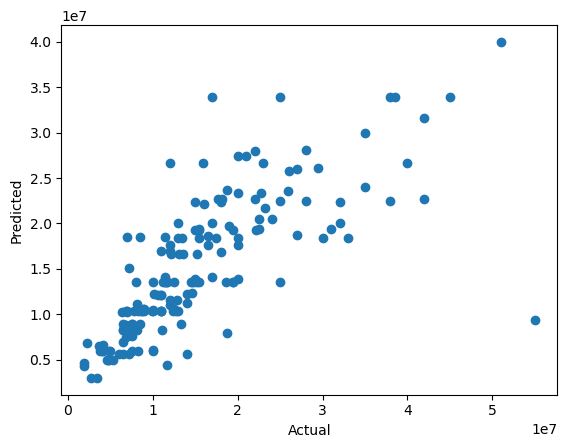

In [25]:
plt.scatter(y_test, y_pred_fin)
plt.xlabel('Actual')
plt.ylabel('Predicted')

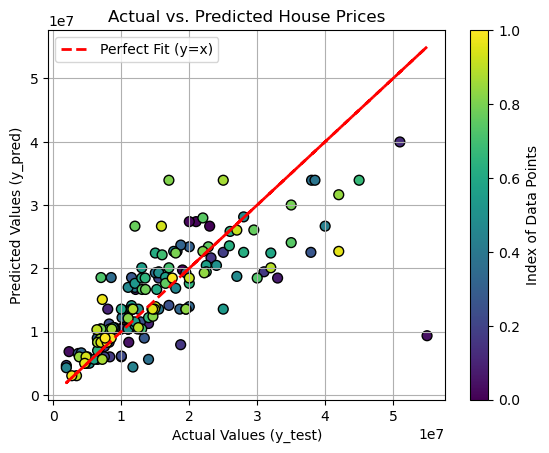

In [26]:
colors = np.linspace(0, 1, len(y_test))  # Color gradient

# Scatter plot
# plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_fin, c=colors, cmap='viridis', edgecolors='k', s=50)

# Add a perfect prediction line (y = x)
plt.plot(y_test, y_test, color='red', linestyle='--', linewidth=2, label="Perfect Fit (y=x)")

# Labels and title
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted House Prices")
plt.colorbar(label="Index of Data Points")
plt.legend()
plt.grid(True)

plt.show()

In [27]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred_fin, 'Difference':y_test-y_pred_fin})
pred_df

,Actual Value,Predicted Value,Difference
512,19000000,1.972938e+07,-7.293786e+05
357,23000000,2.665187e+07,-3.651868e+06
110,21000000,2.736783e+07,-6.367833e+06
684,20000000,2.736783e+07,-7.367833e+06
39,6900000,1.039874e+07,-3.498740e+06
...,...,...,...
296,2700000,3.015433e+06,-3.154333e+05
155,7900000,8.298420e+06,-3.984204e+05
326,8500000,8.963323e+06,-4.633226e+05
101,17500000,1.845309e+07,-9.530941e+05


<Axes: xlabel='Price'>

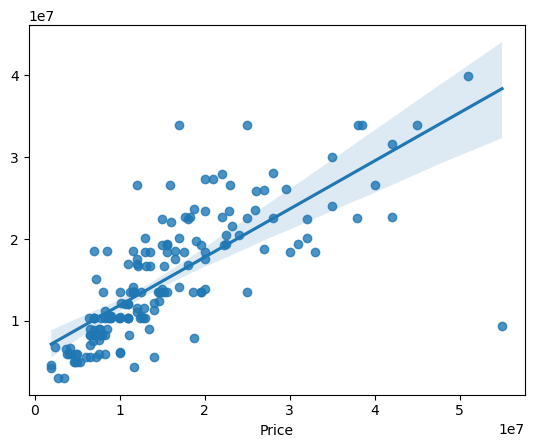

In [33]:
sns.regplot(x=y_test,y=y_pred_fin, ci=95)
# plt.plot(y_test, y_test, color='red', linestyle='--', linewidth=2, label="Perfect Fit (y=x)")